---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [18]:
def answer_one():
    df = pd.read_csv(r"""C:\Users\Administrator\Downloads\Coursera\Applied Machine Learning in Python\course3_downloads\course3_downloads\fraud_data.csv""")
    class_count = np.bincount(df['Class'])
    return class_count[1]/len(df) 
answer_one()

0.016410823768035772

In [23]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"""C:\Users\Administrator\Downloads\Coursera\Applied Machine Learning in Python\course3_downloads\course3_downloads\fraud_data.csv""")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [28]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    predicted = dummy_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    return accuracy, recall
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [35]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    svc_clf = SVC().fit(X_train, y_train)
    predicted = svc_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    return accuracy, recall, precision
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [47]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svc_clf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    prediction = svc_clf.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, prediction)
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


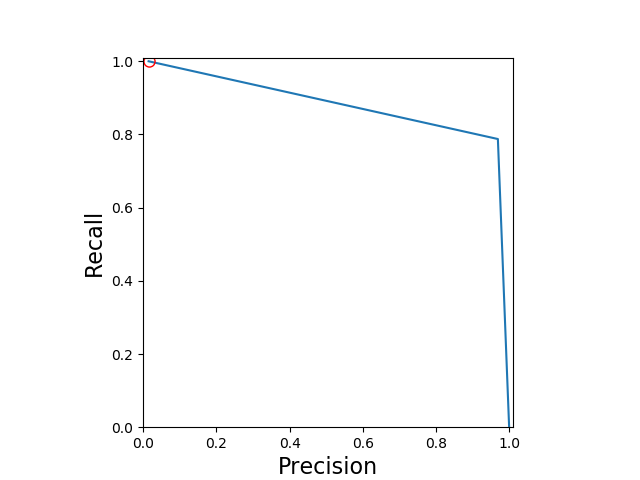

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


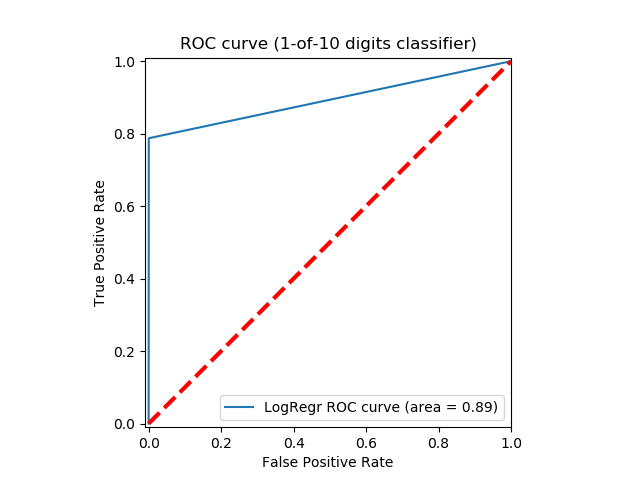

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
precision, recall, threshold = precision_recall_curve(y_test, lr_predicted)

closest_zero = np.argmin(np.abs(threshold))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 8, fillstyle = 'none', c = 'r')
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')
plt.show()

lr_fpr, lr_tpr, _= roc_curve(y_test, lr_predicted)
roc_auc_lr = auc(lr_fpr, lr_tpr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(lr_fpr, lr_tpr, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (1-of-10 digits classifier)')
plt.legend()
plt.plot([0, 1], [0, 1], c = 'r', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [89]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    
    lr = LogisticRegression().fit(X_train, y_train)
    prediction = lr.decision_function(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, prediction)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, prediction)
    rec = float(recall[np.where(precision == 0.75)])
    tpr = float(lr_tpr[np.where((lr_fpr >= 0.159) & (lr_fpr <= 0.161))][0])
    return rec,tpr
answer_five()

(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [90]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty' : ['l1', 'l2'], 'C' : [0.01, 0.1, 1, 10, 100]}
    grid_clf = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_clf.fit(X_train, y_train)
    return np.array(grid_clf.cv_results_['mean_test_score']).reshape(5,2)
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


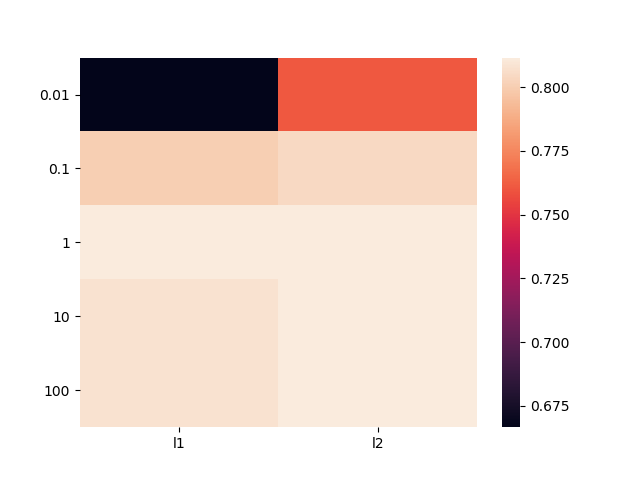

In [92]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())